## Однофакторный дисперсионный анализ

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
df = pd.read_csv('genetherapy.csv')

In [7]:
df.sample(5)

,expr,Therapy
48,89,D
30,91,C
38,100,C
49,91,D
39,85,C


In [12]:
df[df['Therapy']=='A']['expr'].median(), df[df['Therapy']=='B']['expr'].median(), df[df['Therapy']=='C']['expr'].median(), df[df['Therapy']=='D']['expr'].median()

(99.0, 100.0, 96.0, 92.0)

In [13]:
df[df['Therapy']=='A']['expr'].std(), df[df['Therapy']=='B']['expr'].std(), df[df['Therapy']=='C']['expr'].std(), df[df['Therapy']=='D']['expr'].std()

(4.1656189158852435, 5.894307180904058, 5.193402408000807, 3.7352886036263593)

In [14]:
df[df['Therapy']=='A']['expr'].count(), df[df['Therapy']=='B']['expr'].count(), df[df['Therapy']=='C']['expr'].count(), df[df['Therapy']=='D']['expr'].count()

(15, 15, 15, 15)

In [16]:
table = pd.DataFrame(columns = ['Therapy', 'N', 'M', 'SD'])

In [17]:
table['Therapy'] = ['A','B', 'C', 'D']

In [23]:
table.loc[table['Therapy'] == 'A','M'] = df[df['Therapy']=='A']['expr'].median()
table.loc[table['Therapy'] == 'B','M'] = df[df['Therapy']=='B']['expr'].median()
table.loc[table['Therapy'] == 'C','M'] = df[df['Therapy']=='C']['expr'].median()
table.loc[table['Therapy'] == 'D','M'] = df[df['Therapy']=='D']['expr'].median()

In [25]:
table.loc[table['Therapy'] == 'A','N'] = df[df['Therapy']=='A']['expr'].count()
table.loc[table['Therapy'] == 'B','N'] = df[df['Therapy']=='B']['expr'].count()
table.loc[table['Therapy'] == 'C','N'] = df[df['Therapy']=='C']['expr'].count()
table.loc[table['Therapy'] == 'D','N'] = df[df['Therapy']=='D']['expr'].count()

In [27]:
table.loc[table['Therapy'] == 'A','SD'] = df[df['Therapy']=='A']['expr'].std()
table.loc[table['Therapy'] == 'B','SD'] = df[df['Therapy']=='B']['expr'].std()
table.loc[table['Therapy'] == 'C','SD'] = df[df['Therapy']=='C']['expr'].std()
table.loc[table['Therapy'] == 'D','SD'] = df[df['Therapy']=='D']['expr'].std()

In [28]:
table.head()

,Therapy,N,M,SD
0,A,15,99,4.16562
1,B,15,100,5.89431
2,C,15,96,5.1934
3,D,15,92,3.73529


- **Therapy** - независимая переменная
- **Уровень** экспрессии гена - зависимая переменная
- **H0** - Нулевой гипотезой будет М1 = М2 = М3 = М4

In [80]:
analyse_res = stats.f_oneway(df[df['Therapy']=='A']['expr'],df[df['Therapy']=='B']['expr'],df[df['Therapy']=='C']['expr'],df[df['Therapy']=='D']['expr'])

In [85]:
'f-value = ' + str(analyse_res.statistic), 'p-value = ' + str(analyse_res.pvalue)

('f-value = 8.03730248114399', 'p-value = 0.00015249722895229536')

In [111]:
err_1 = 0.1 + 0.2*np.sqrt(df['expr'])

Text(0.5, 1.0, 'Уровень экспрессии гена при различной терапии')

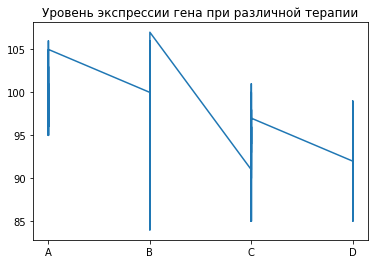

In [125]:
# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x = df['Therapy'], y= df['expr'])
plt.title("Уровень экспрессии гена при различной терапии")